In [58]:
import pandas as pd
import numpy as np
import os
import sys
import time

import matplotlib.pyplot as plt
%matplotlib inline

# Keras imports
import keras
print("Keras version: %s" % keras.__version__)
from keras.datasets import mnist
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential

Keras version: 2.1.5


Load some toy data to work with

In [117]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [118]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [119]:
x_train = x_train.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

In [120]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [121]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

Let us build a simple deep neural network in order to establish a baseline. 

The best result I have gotten using a classical model (random ensembling of a tuned `GradientBoostingClassifier`) is $98.7\%$. Let's try to beat that!

In [170]:
del model

model = Sequential([
    Dense(512, activation='relu', input_shape=(int(28*28),)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

from keras.optimizers import RMSprop
opt = RMSprop(lr=0.01)
loss='categorical_crossentropy'
metrics = ['accuracy']

model.compile(optimizer=opt, loss=loss, metrics=metrics)

Train the model

In [171]:
n_epochs = 50

In [172]:
model.optimizer.lr = 1e-2

In [173]:
history = model.fit(x_train, y_train, epochs=n_epochs, verbose=1, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 91us/step - loss: 0.4285 - acc: 0.8716 - val_loss: 0.2030 - val_acc: 0.9460
Epoch 2/50
48000/48000 [==============================] - 4s 80us/step - loss: 0.2286 - acc: 0.9350 - val_loss: 0.1352 - val_acc: 0.9623
Epoch 3/50
48000/48000 [==============================] - 4s 81us/step - loss: 0.1831 - acc: 0.9474 - val_loss: 0.1265 - val_acc: 0.9654
Epoch 4/50
48000/48000 [==============================] - 4s 81us/step - loss: 0.1611 - acc: 0.9552 - val_loss: 0.1555 - val_acc: 0.9560
Epoch 5/50
48000/48000 [==============================] - 4s 81us/step - loss: 0.1446 - acc: 0.9592 - val_loss: 0.1101 - val_acc: 0.9716
Epoch 6/50
48000/48000 [==============================] - 4s 81us/step - loss: 0.1366 - acc: 0.9616 - val_loss: 0.1190 - val_acc: 0.9689
Epoch 7/50
48000/48000 [==============================] - 4s 81us/step - loss: 0.1290 - acc: 0.9647 - val_loss: 0.1055 - val_acc

In [174]:
epochs = range(1, n_epochs+1)
train_accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

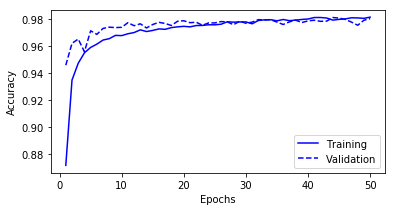

In [175]:
plt.figure(figsize=(6,3))
# b+ is for "blue cross"
plt.plot(epochs, train_accuracy, 'b-', label='Training')
# "bo" is for "blue dot"
plt.plot(epochs, val_accuracy, 'b--', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [176]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 50us/step


[0.11428790342416423, 0.98129999999999995]

# Convolutional neural network implementation

In [189]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [190]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [201]:
Conv2D?

In [196]:
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

In [197]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 64)                36928     
__________

In [198]:
opt = RMSprop()
loss='categorical_crossentropy'
metrics = ['accuracy']
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [199]:
cnn_hist = cnn.fit(x_train, y_train, epochs=5, verbose=1, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 29s 483us/step - loss: 0.1725 - acc: 0.9453
Epoch 2/5
60000/60000 [==============================] - 30s 504us/step - loss: 0.0484 - acc: 0.9849
Epoch 3/5
60000/60000 [==============================] - 29s 490us/step - loss: 0.0336 - acc: 0.9896
Epoch 4/5
60000/60000 [==============================] - 30s 507us/step - loss: 0.0245 - acc: 0.9926
Epoch 5/5
60000/60000 [==============================] - 30s 499us/step - loss: 0.0194 - acc: 0.9940


In [200]:
cnn.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 184us/step


[0.028136635534705783, 0.99170000000000003]

# Data augmentation on the "dogscats" dataset

In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [2]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [5]:
img = load_img('keras/data/samples/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', 
                          save_prefix='cat', 
                          save_format='jpeg'):
    i += 1
    if i > 20: break  # otherwise the generator would loop indefinitely

In [59]:
import glob, shutil
cat_files = glob.glob('keras/data/train/cat.*.jpg', recursive=True)
dog_files = glob.glob('keras/data/train/dog.*.jpg', recursive=True)
len(cat_files), len(dog_files)

(11493, 11500)

In [60]:
import numpy as np
# Sample 500 from each class and later move to validation folder
cat_files_random = np.random.choice(cat_files, size=500, replace=False)
dog_files_random = np.random.choice(dog_files, size=500, replace=False)

In [61]:
# Move files!

cat_destination = "keras/data/validation/cats/"
for filename in cat_files_random:
    shutil.move(filename, cat_destination)
    
dog_destination = "keras/data/validation/dogs/" 
for filename in dog_files_random:
    shutil.move(filename, dog_destination)

## Define CNN model

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [5]:
batch_size = 16

In [6]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'keras/data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'keras/data/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=1000 // batch_size)

Epoch 1/5
125/125 [==============================] - 49s 390ms/step - loss: 0.7476 - acc: 0.5180 - val_loss: 0.6760 - val_acc: 0.6338
Epoch 2/5
125/125 [==============================] - 48s 383ms/step - loss: 0.6811 - acc: 0.5690 - val_loss: 0.6543 - val_acc: 0.5850
Epoch 3/5
125/125 [==============================] - 48s 382ms/step - loss: 0.6581 - acc: 0.6155 - val_loss: 0.6099 - val_acc: 0.6637
Epoch 4/5
125/125 [==============================] - 47s 373ms/step - loss: 0.6434 - acc: 0.6600 - val_loss: 0.6218 - val_acc: 0.6675
Epoch 5/5
125/125 [==============================] - 47s 373ms/step - loss: 0.6193 - acc: 0.6745 - val_loss: 0.7292 - val_acc: 0.6525


In [9]:
model.save_weights('keras/first_try.h5')